In [1]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

pos = nx.spring_layout(model.G)


for j in range(700):
    model.step()

agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes migrated agent
agent becomes 

In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data = agent_data.xs(624, level="Step")
agent_data #['current_crop'].value_counts().sum

,Age,Salinity,Savings,Loan_size,maximum_debt,income,abilities,current_crop,New crop
AgentID,,,,,,,,,
1,"[15, 53, 54, 55, 56, 77]",7.857087,2.518452e+06,0.0,8872.884120,113185.030695,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
2,"[25, 29, 53]",6.684252,4.919998e+06,0.0,15183.630372,221359.280101,"[{'strategy': 'Rice', 'FA': 1, 'IA': 0.8095238...",Rice,Rice
3,"[15, 16, 20, 24, 26, 49, 53, 54, 57, 59]",6.562993,2.041158e+06,0.0,5386.859382,82611.097368,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Mango,Mango
4,"[3, 22, 26, 28, 30, 55, 56]",8.292487,1.615765e+06,0.0,6727.928684,80050.915596,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
5,"[15, 36, 41, 46, 50, 54, 76]",8.254053,2.406059e+06,0.0,7383.625798,118589.811368,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Mango,Mango
6,"[3, 27, 31, 36, 37, 57, 62, 63, 68]",6.711900,2.396095e+06,0.0,9206.036595,120801.102532,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
7,"[16, 37, 42, 44, 46, 47]",6.974722,2.278407e+06,0.0,7910.036599,102114.759685,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
8,"[12, 38, 41, 44, 48, 51]",7.009950,2.132825e+06,0.0,8166.689705,108840.165327,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
9,"[15, 16, 35, 58]",8.100065,3.532220e+05,0.0,3202.822025,22360.005120,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Mango,Mango


### PLOT AGENTS ON THE MAP

AttributeError: 'Low_skilled_wage_worker' object has no attribute 'node_id'

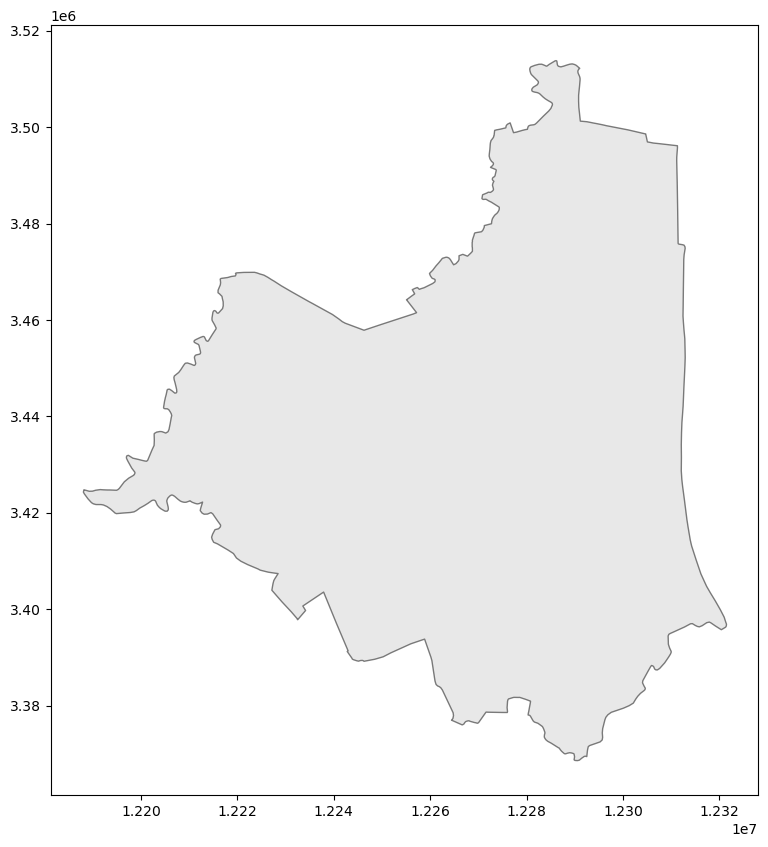

In [4]:
import matplotlib.lines as mlines

def plot_network(ax, model):
    ax.clear()

    # Plot province map
    model.polygon.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get the positions of the nodes and make a dictionary with the nodes and agents
    pos = nx.get_node_attributes(model.G, 'pos')

    node_to_agent = {}
    for agent in model.agents:
        node_to_agent[agent.node_id] = agent

    # Give each node a color, based on their agent type
    colors = []
    for node_id in model.G.nodes():
        agent = node_to_agent.get(node_id)  
        if agent:
            if agent.agent_type == "Agri_small_saline":
                colors.append('blue')
            elif agent.agent_type == "Agri_small_fresh":
                colors.append('green')
            else:
                colors.append('red')  
        else:
            colors.append("gray")  # something went wrong here, so the node is then gray

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Agri_small_saline')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Agri_small_fresh')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Other')
    ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right', title='Agent Types')

    # Plot netwerk
    nx.draw(model.G, pos, node_color=colors, node_size=60, edge_color="gray", ax=ax)
    ax.set_title(f"Social Network of {model.province} at Step {model.steps}", fontsize=12)

# Call function above to plot the map
fig, ax = plt.subplots(figsize=(10, 10))
plot_network(ax, model)
plt.show()
